# **Big Data Mart Sales Problem**

**Problem Statement:**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

**Break-down of Problem Statement**

This is a supervised machine learning algorithm with a target label as : (Item_Outlet_Sales) .
Also Since we are expected to predict the sale price for a given product , it becomes a **Regression** Problem

**Attribute Information** 

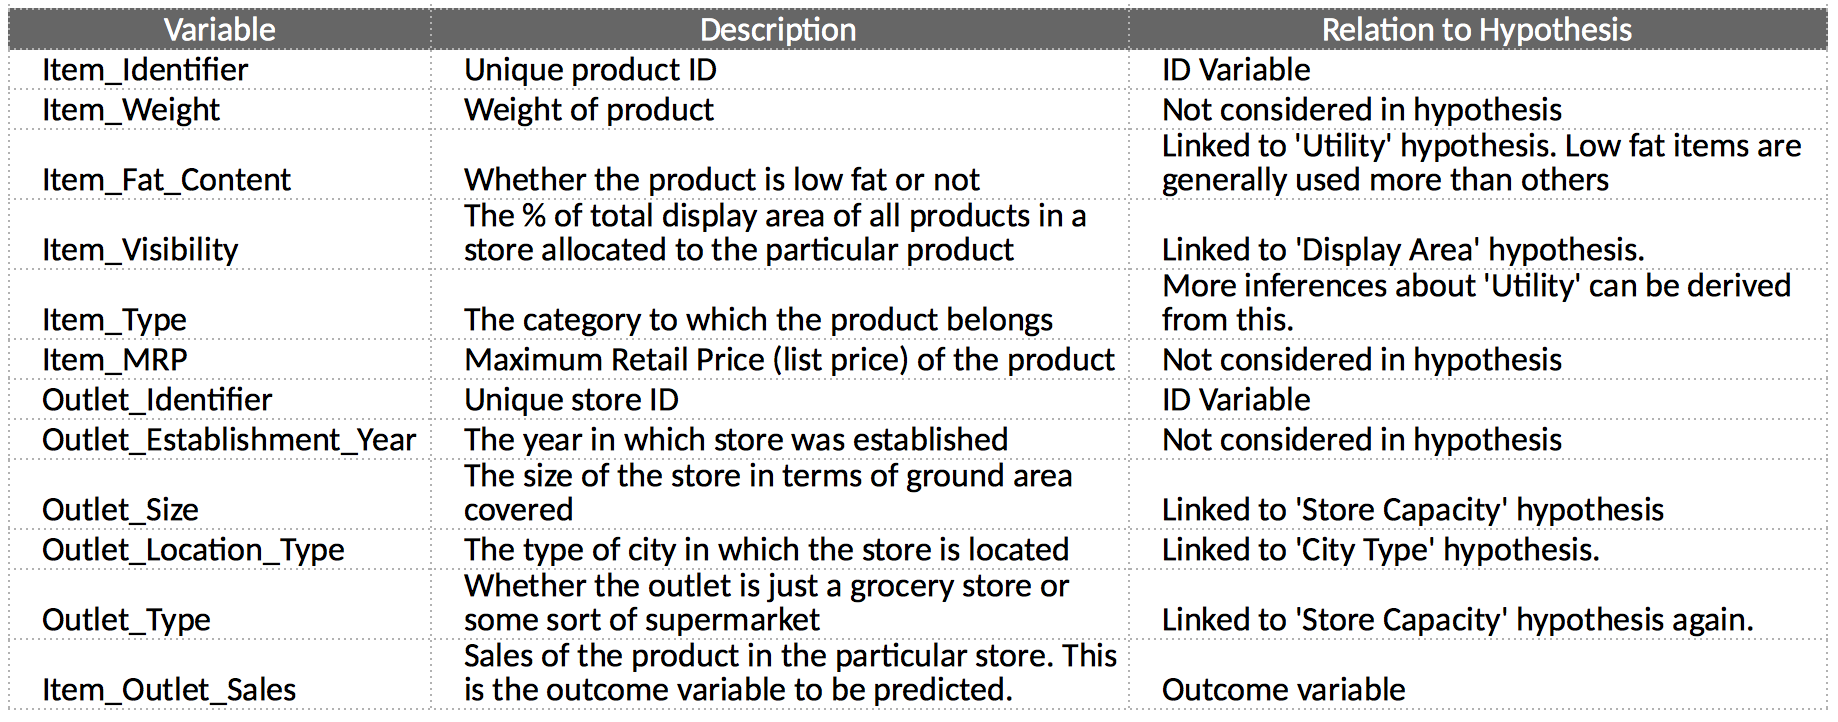

**Getting Started**

In [312]:
from google.colab import drive

In [313]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [314]:
#Importing the python libraries and packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [315]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, ‘bigdatamart_Test.csv’ and 'bigdatamart_Train.csv') to DataFrame format.

Test_Data = pd.read_csv("/content/drive/MyDrive/Python_Datasets/bigdatamart_Test.csv")
Train_Data = pd.read_csv("/content/drive/MyDrive/Python_Datasets/bigdatamart_Train.csv")

In [316]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods.

Train_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [317]:
Test_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [318]:
#The .info() method will give you a concise summary of the DataFrame.

Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8352 non-null   object 
 1   Item_Weight                6917 non-null   float64
 2   Item_Fat_Content           8352 non-null   object 
 3   Item_Visibility            8352 non-null   float64
 4   Item_Type                  8352 non-null   object 
 5   Item_MRP                   8351 non-null   float64
 6   Outlet_Identifier          8351 non-null   object 
 7   Outlet_Establishment_Year  8351 non-null   float64
 8   Outlet_Size                5991 non-null   object 
 9   Outlet_Location_Type       8351 non-null   object 
 10  Outlet_Type                8351 non-null   object 
 11  Item_Outlet_Sales          8351 non-null   float64
dtypes: float64(5), object(7)
memory usage: 783.1+ KB


In [319]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Observation** : There are both numerical and categorical variables having float , int and object type values .

In [320]:
#Description of Data

Train_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,6917.0,12.872565,4.645417,4.555,8.785000,12.600000,16.85000,21.350000
Item_Visibility,8352.0,0.066218,0.051670,0.000,0.026953,0.054062,0.09484,0.328391
Item_MRP,8351.0,141.041540,62.362602,31.290,93.743600,143.015400,185.82660,266.888400
Outlet_Establishment_Year,8351.0,1997.815351,8.369257,1985.000,1987.000000,1999.000000,2004.00000,2009.000000
Item_Outlet_Sales,8351.0,2184.312726,1709.734743,33.290,838.908000,1794.331000,3103.95960,13086.964800


In [321]:
Test_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [322]:
#The shape of the dataset

print('Train_Data :',Train_Data.shape)

Train_Data : (8352, 12)


In [323]:
#The shape of the dataset

print('Test_Data :',Test_Data.shape)

Test_Data : (5681, 11)


**Observation** : This shows that dataset contains 8352 rows, 12 columns in Train_Data and 5681 rows , 11 columns in Test_Data

In [324]:
#Checking Null Values

Train_Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1435
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        1
Outlet_Identifier               1
Outlet_Establishment_Year       1
Outlet_Size                  2361
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales               1
dtype: int64

In [325]:
Test_Data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

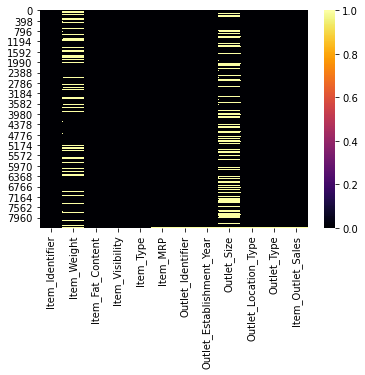

In [326]:
#Checking of null values in our dataset by passing a heatmap function.

sns.heatmap(Train_Data.isnull(),cmap='inferno')

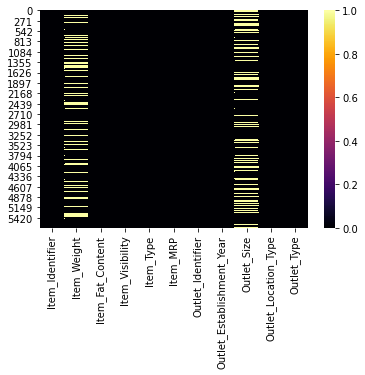

In [327]:
sns.heatmap(Test_Data.isnull(),cmap='inferno')

**Concatenating Both Data's**

In [328]:
Train_Data['Source'] = 'train'
Test_Data['Source'] = 'test'
df = pd.concat([Train_Data,Test_Data],ignore_index = True)

Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train. Lets combine them into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.

In [329]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,train


In [330]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
14028,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997.0,Small,Tier 1,Supermarket Type1,NaN,test
14029,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,NaN,test
14030,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,NaN,test
14031,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007.0,NaN,Tier 2,Supermarket Type1,NaN,test
14032,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,NaN,test


In [331]:
df.shape

(14033, 13)

In [332]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2411
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        1
Outlet_Identifier               1
Outlet_Establishment_Year       1
Outlet_Size                  3967
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales            5682
Source                          0
dtype: int64

**Observation** :Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

In [333]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11622.000000,14033.000000,14032.000000,14032.000000,8351.000000
mean,12.800937,0.066002,141.034145,1997.820838,2184.312726
std,4.653903,0.051500,62.136895,8.370176,1709.734743
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027025,93.911350,1987.000000,838.908000
50%,12.600000,0.054142,142.247000,1999.000000,1794.331000
75%,16.750000,0.094083,185.924650,2004.000000,3103.959600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Some observations:**

Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

In [334]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              12859
Item_Type                       17
Item_MRP                      8002
Outlet_Identifier               11
Outlet_Establishment_Year       10
Outlet_Size                      4
Outlet_Location_Type             4
Outlet_Type                      5
Item_Outlet_Sales             3463
Source                           2
dtype: int64

This tells us that there are 1559 products and 11 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 17 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

In [335]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8377
Regular    4770
LF          517
reg         193
low fat     176
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1989
Snack Foods              1965
Household                1531
Frozen Foods             1408
Dairy                    1129
Baking Goods             1076
Canned                   1069
Health and Hygiene        841
Meat                      725
Soft Drinks               714
Breads                    414
Hard Drinks               359
Others                    276
Starchy Foods             264
Breakfast                 186
Seafood                    86
Ho                          1
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4603
Small     3926
High      1537
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5521
Tier 2    4573
Tier 1    3938
Name: Outlet_

**The output gives us following observations:**

Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

In [336]:
Train_Data.Item_Type.value_counts()

Fruits and Vegetables    1208
Snack Foods              1176
Household                 893
Frozen Foods              838
Dairy                     675
Baking Goods              638
Canned                    634
Health and Hygiene        503
Soft Drinks               433
Meat                      414
Breads                    249
Hard Drinks               211
Others                    165
Starchy Foods             143
Breakfast                 110
Seafood                    61
Ho                          1
Name: Item_Type, dtype: int64

**EDA(Exploratory Data Analysis)**

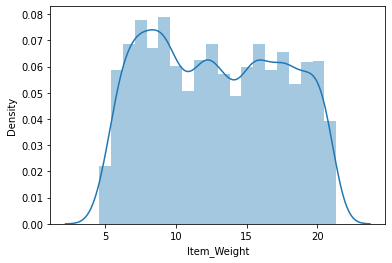

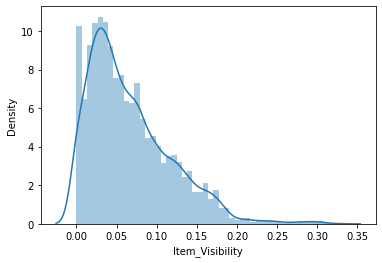

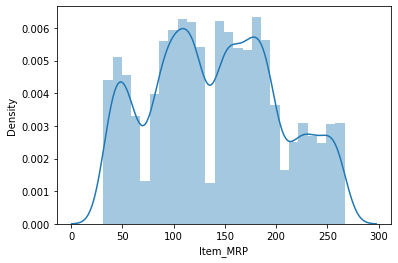

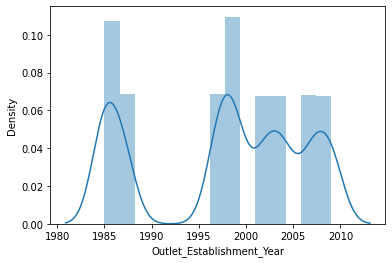

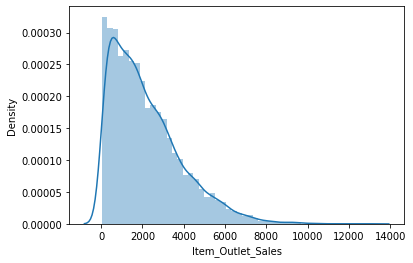

In [337]:
for i in Train_Data.describe().columns:
   sns.distplot(Train_Data[i].dropna())
   plt.show()

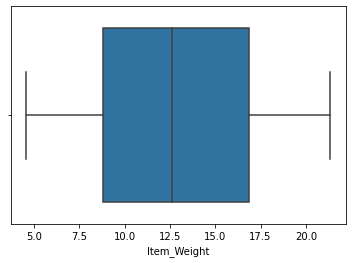

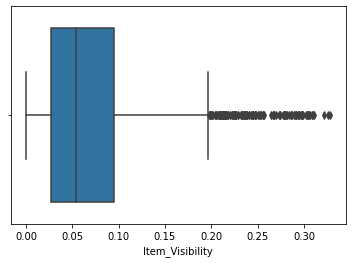

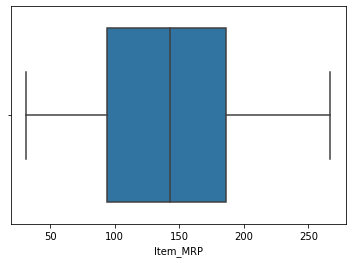

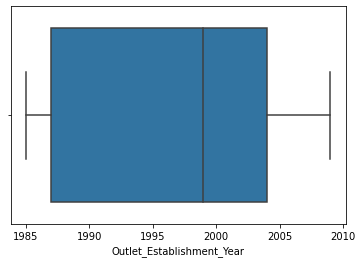

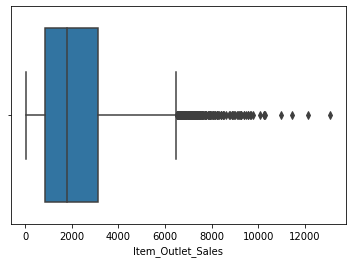

In [338]:
for i in Train_Data.describe().columns:
  sns.boxplot(Train_Data[i].dropna())
  plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

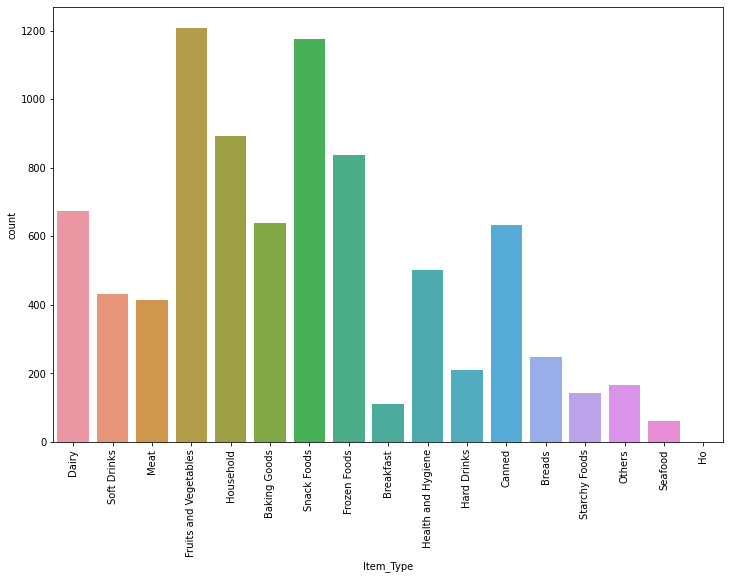

In [339]:
plt.figure(figsize=(12,8))
sns.countplot(Train_Data.Item_Type)
plt.xticks(rotation=90)

**Distribution of Outlet Size**

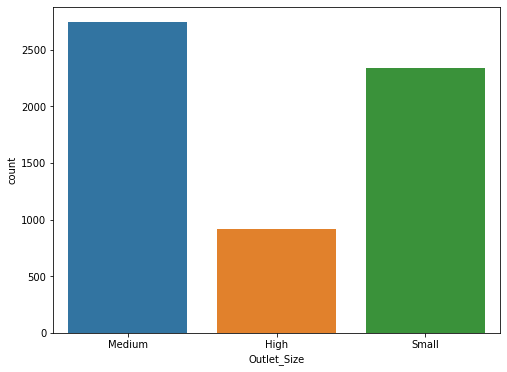

In [340]:
plt.figure(figsize=(8,6))
sns.countplot(Train_Data.Outlet_Size)

In [341]:
Train_Data.Outlet_Size.value_counts()

Medium    2741
Small     2334
High       916
Name: Outlet_Size, dtype: int64

**Distribution of Outlet Location Type**

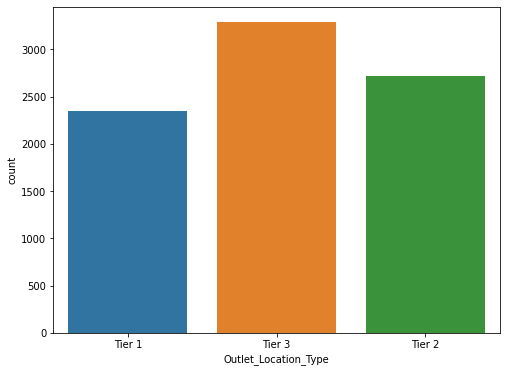

In [342]:
plt.figure(figsize=(8,6))
sns.countplot(Train_Data.Outlet_Location_Type)

In [343]:
Train_Data.Outlet_Location_Type.value_counts()

Tier 3    3288
Tier 2    2717
Tier 1    2346
Name: Outlet_Location_Type, dtype: int64

**Distribution of Outlet Type**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

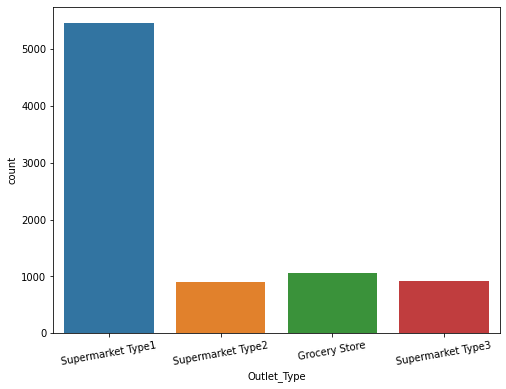

In [344]:
plt.figure(figsize=(8,6))
sns.countplot(Train_Data.Outlet_Type)
plt.xticks(rotation=10)

In [345]:
Train_Data.Outlet_Type.value_counts()

Supermarket Type1    5465
Grocery Store        1061
Supermarket Type3     920
Supermarket Type2     905
Name: Outlet_Type, dtype: int64

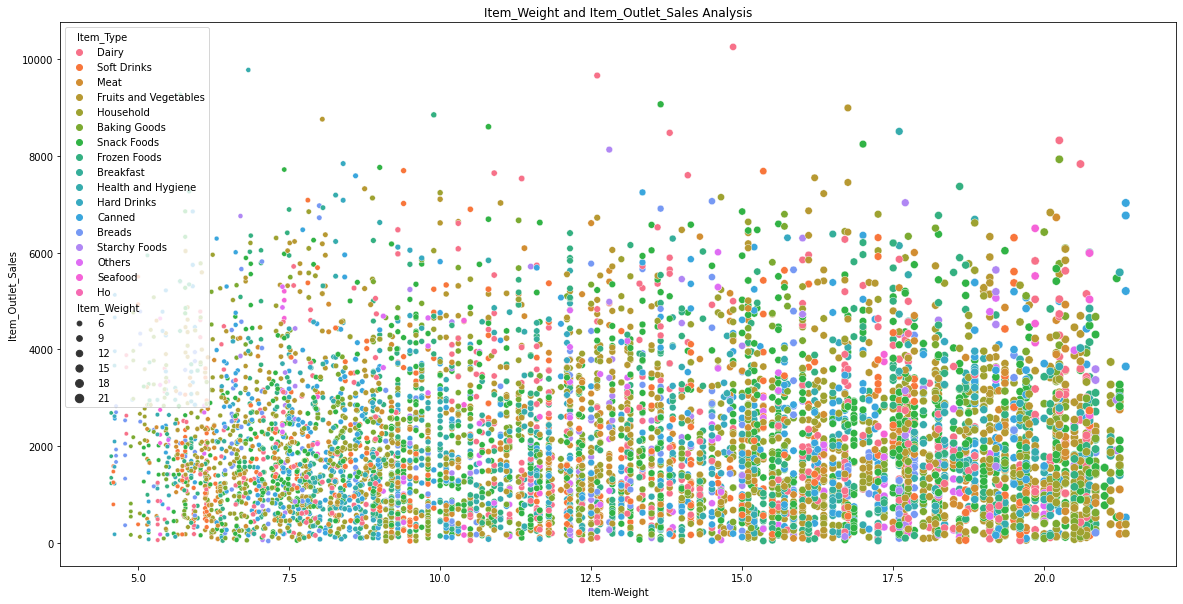

In [346]:
plt.figure(figsize=(20,10))
plt.xlabel("Item-Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")

sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data =Train_Data)

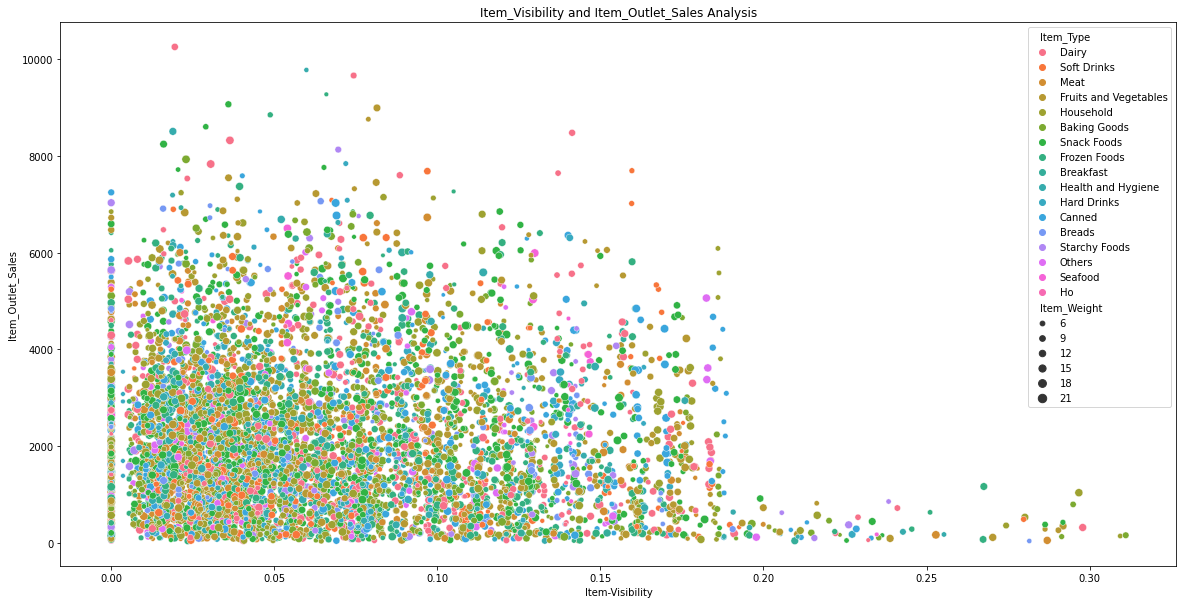

In [347]:
plt.figure(figsize=(20,10))
plt.xlabel("Item-Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")

sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data =Train_Data)

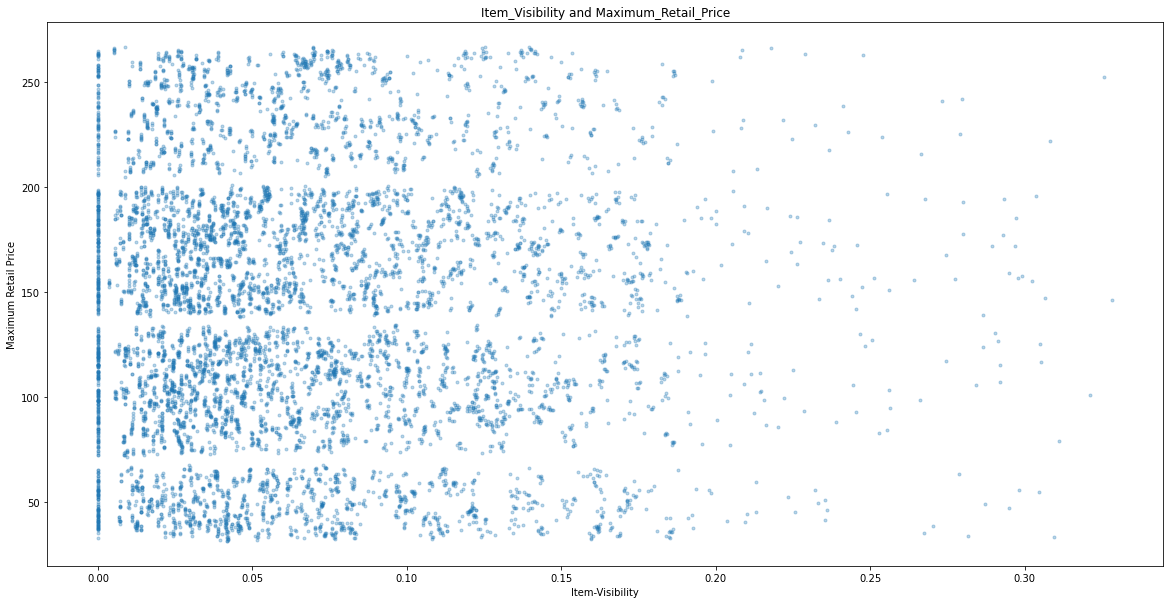

In [348]:
plt.figure(figsize=(20,10))
plt.xlabel("Item-Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility and Maximum_Retail_Price")

plt.plot(Train_Data.Item_Visibility, Train_Data.Item_MRP,".",alpha = 0.3)

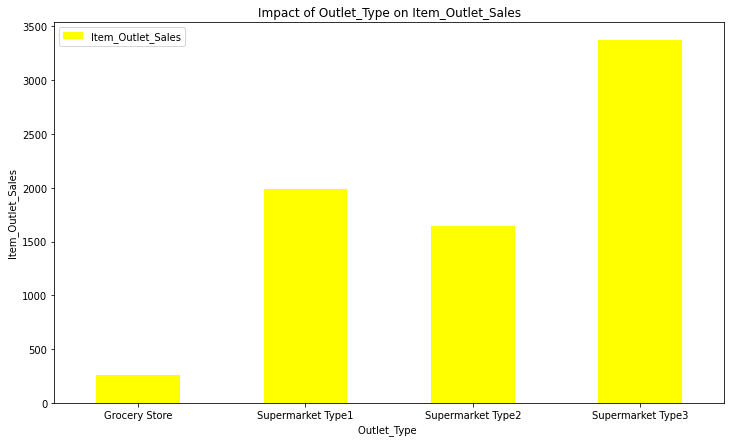

In [349]:
Outlet_Type_pivot = \
Train_Data.pivot_table(index= 'Outlet_Type',values='Item_Outlet_Sales', aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='yellow', figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)

plt.show()

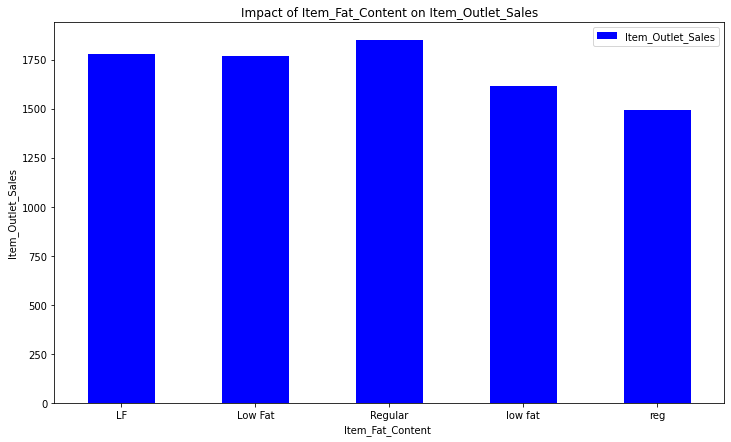

In [350]:
Outlet_Type_pivot = \
Train_Data.pivot_table(index= 'Item_Fat_Content',values='Item_Outlet_Sales', aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue', figsize=(12,7))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)

plt.show()

In [351]:
df['Item_Fat_Content'].value_counts()

Low Fat    8377
Regular    4770
LF          517
reg         193
low fat     176
Name: Item_Fat_Content, dtype: int64

In [352]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [353]:
df['Item_Fat_Content'].value_counts()

Low Fat    9070
Regular    4963
Name: Item_Fat_Content, dtype: int64

In [354]:
Train_Data['Item_Fat_Content'].value_counts()

Low Fat    4981
Regular    2835
LF          311
reg         115
low fat     110
Name: Item_Fat_Content, dtype: int64

In [355]:
Train_Data['Item_Fat_Content'] = Train_Data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [356]:
Train_Data['Item_Fat_Content'].value_counts()

Low Fat    5402
Regular    2950
Name: Item_Fat_Content, dtype: int64

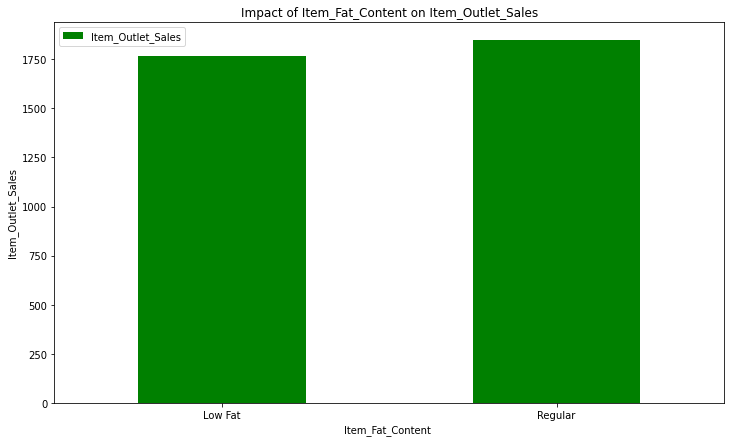

In [357]:
Outlet_Type_pivot = \
Train_Data.pivot_table(index= 'Item_Fat_Content',values='Item_Outlet_Sales', aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='green', figsize=(12,7))
plt.xlabel("Item_Fat_Content ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)

plt.show()

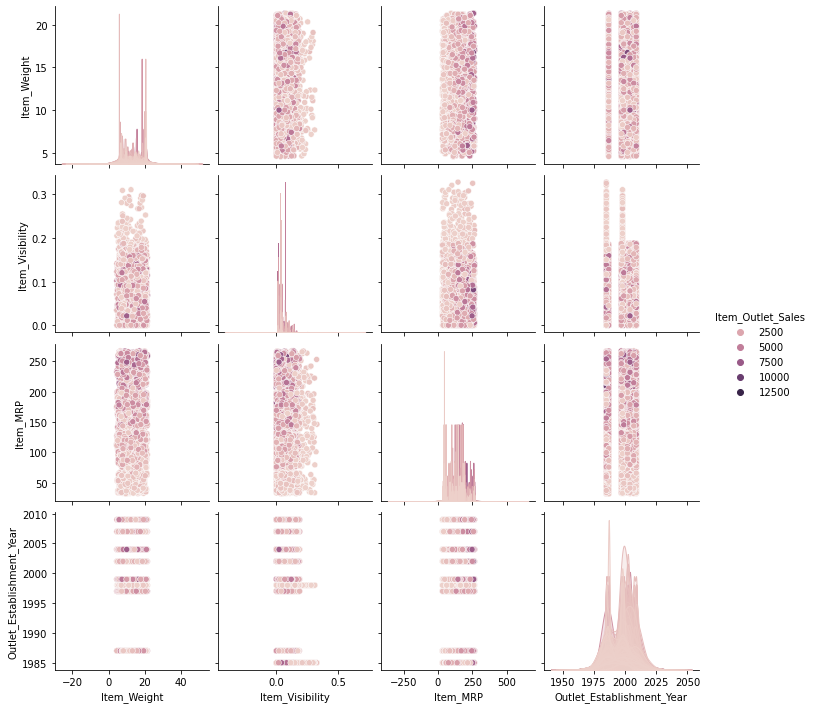

In [358]:
sns.pairplot(df,hue="Item_Outlet_Sales")

**Checking Correlation**

In [359]:
cor = Train_Data.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014072,0.028337,-0.014183,0.014067
Item_Visibility,-0.014072,1.000000,-0.000760,-0.076154,-0.129005
Item_MRP,0.028337,-0.000760,1.000000,0.006186,0.568127
Outlet_Establishment_Year,-0.014183,-0.076154,0.006186,1.000000,-0.052521
Item_Outlet_Sales,0.014067,-0.129005,0.568127,-0.052521,1.000000


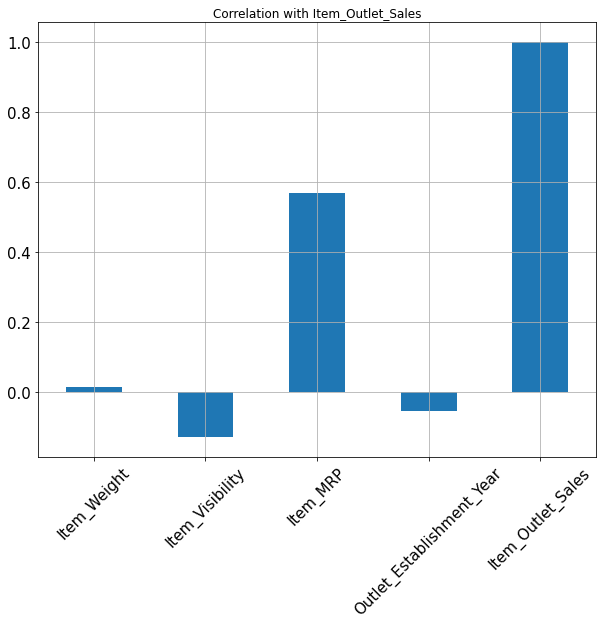

In [360]:
#Correlation with sales with respect to attributes

Train_Data.corrwith(Train_Data.Item_Outlet_Sales).plot.bar(
        figsize = (10, 8), title = "Correlation with Item_Outlet_Sales", fontsize = 15,
        rot = 45, grid = True)

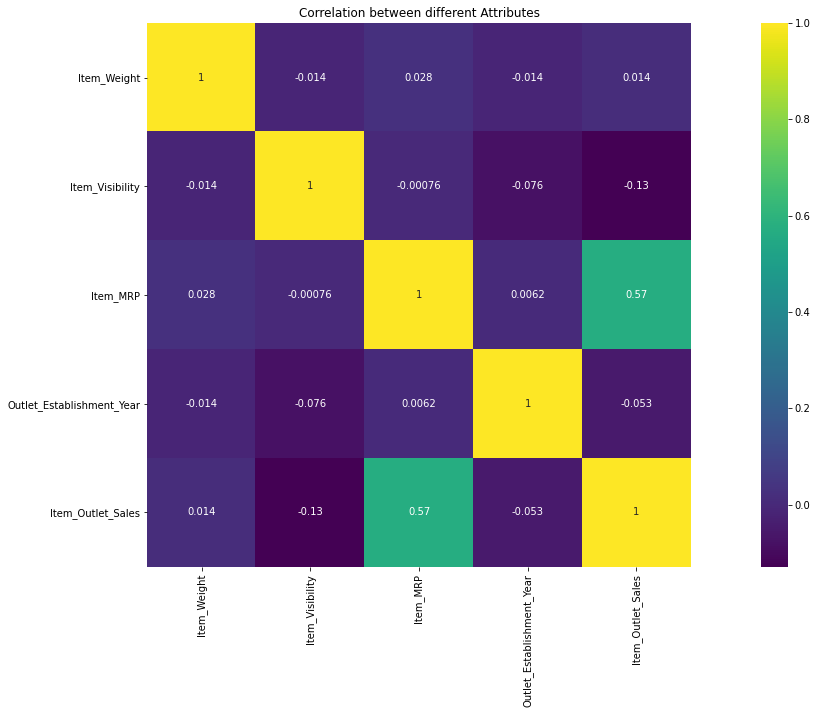

In [361]:
plt.figure(figsize=(25,10))
sns.heatmap(Train_Data.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different Attributes')
plt.show()

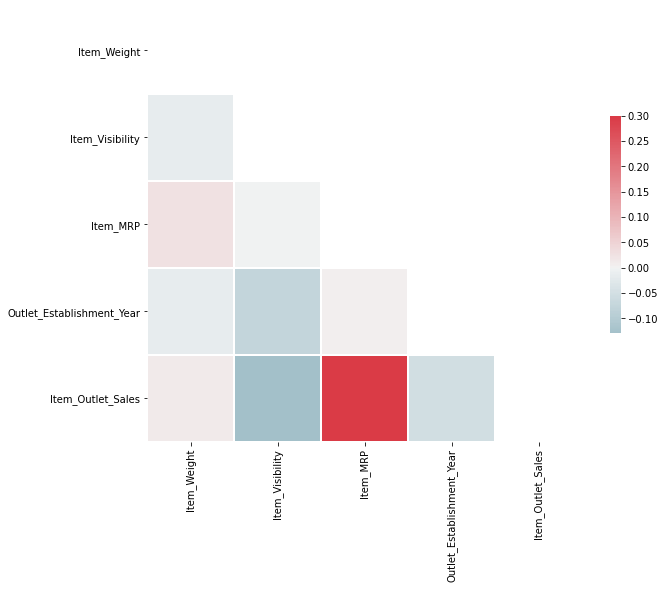

In [362]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14033 entries, 0 to 14032
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14033 non-null  object 
 1   Item_Weight                11622 non-null  float64
 2   Item_Fat_Content           14033 non-null  object 
 3   Item_Visibility            14033 non-null  float64
 4   Item_Type                  14033 non-null  object 
 5   Item_MRP                   14032 non-null  float64
 6   Outlet_Identifier          14032 non-null  object 
 7   Outlet_Establishment_Year  14032 non-null  float64
 8   Outlet_Size                10066 non-null  object 
 9   Outlet_Location_Type       14032 non-null  object 
 10  Outlet_Type                14032 non-null  object 
 11  Item_Outlet_Sales          8351 non-null   float64
 12  Source                     14033 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.4+ MB

In [364]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].astype('str')
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype('str')
df['Outlet_Type'] = df['Outlet_Type'].astype('str')

# **Feature Engineering and Transformation**

**Treating Missing Values**

In [365]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2411
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        1
Outlet_Identifier               0
Outlet_Establishment_Year       1
Outlet_Size                  3967
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5682
Source                          0
dtype: int64

Item_Weight

From the Boxplot we plotted at beginning , we noticed that the Item_weight column is approximately Gaussian(Normal Distribution) so it will be a good choice to replace the Nan values with the mean of the column .

In [366]:
df['Item_Weight'].mean() #We will replace the Nan values with this mean()

12.80093701600483

In [367]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

Outliet_Size

We will be replacing the Nan values in the Outliet_Size column with Medium since we dont precisely know the outlet size , so we cannot say it is large or it is small, but Medium lies in between large and small so it is ideal to consider it that way and also the mode is medium

In [368]:
df['Outlet_Size'].value_counts()

Medium    4603
Small     3926
High      1537
Name: Outlet_Size, dtype: int64

In [369]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [370]:
df['Item_MRP'].fillna(df['Item_MRP'].mean(),inplace=True)

In [371]:
df['Outlet_Establishment_Year'].fillna(df['Outlet_Establishment_Year'].mean(),inplace=True)

In [372]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5682
Source                          0
dtype: int64

**Observation** : As expected Item_Outlet_Sales consisting of Null values.

In [373]:
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(),inplace=True)

In [374]:
Train_Data.shape

(8352, 13)

In [375]:
Test_Data.shape

(5681, 12)

In [376]:
df.shape

(14033, 13)

**Item Visibility**

The Item_visibilty had the minimum value of 0 from our earlier descriptive statistics , but all the items need to be visible to the customers 

In [377]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

866

In [378]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

**Outlet Years**

In [379]:
df['Outlet_Establishment_Year'].value_counts()

1985.000000    2410
1987.000000    1537
1999.000000    1536
1997.000000    1536
2007.000000    1526
2004.000000    1524
2009.000000    1523
2002.000000    1523
1998.000000     917
1997.820838       1
Name: Outlet_Establishment_Year, dtype: int64

We wanted to make a new column depicting the years of operation of a store. This can be done as:

In [380]:
df['Outlet_Years'] = 2010 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14033.000000
mean        12.179162
std          8.369877
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

This shows stores which are 4-28 years old. Notice I’ve used 2013. Why? Read the problem statement carefully and you’ll know.

In [381]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1989
Snack Foods              1965
Household                1531
Frozen Foods             1408
Dairy                    1129
Baking Goods             1076
Canned                   1069
Health and Hygiene        841
Meat                      725
Soft Drinks               714
Breads                    414
Hard Drinks               359
Others                    276
Starchy Foods             264
Breakfast                 186
Seafood                    86
Ho                          1
Name: Item_Type, dtype: int64

**Observation** : The item types are food , drinks or non-consumable

In [382]:
df['Item_Identifier'].value_counts()

FDV20    10
DRL60    10
NCN41    10
FDD05    10
FDR27    10
         ..
FDI19     7
FDW31     7
DRJ49     6
FDB46     6
FDL50     6
Name: Item_Identifier, Length: 1559, dtype: int64

A close look at each of the Item_Identifier shows that they either starts with "FD"(Food),"DR"(Drinks) or "NC"(Non-Consumable)

For us to do a better analysis , we will be creating 3 categories as pointed out instead of the already existing 16 categories .

In [383]:
#Changing only the first 2 characters i.e, category ID

df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x:x[0:2])

Earlier we saw that the Item_Type variable has 17 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [384]:
#Rename them to more intuitive categories:

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              10083
Non-Consumable     2649
Drinks             1301
Name: New_Item_Type, dtype: int64

We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [385]:
#Mark Non-Consumables as separate category in low_fat:

df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6421
Regular       4963
Non-Edible    2649
Name: Item_Fat_Content, dtype: int64

Under normal circumstance , if a product is more visible , then its likely it will be getting higher sales . 

In [386]:
item_visib_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [387]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.124412
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In step 1 we hypothesized that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made above to achieve this.

In [388]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype('float')

df['Item_Visibility'].describe()

count    14033.000000
mean         0.066002
std          0.051500
min          0.000000
25%          0.027025
50%          0.054142
75%          0.094083
max          0.328391
Name: Item_Visibility, dtype: float64

In [389]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Non-Edible
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,Medium,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


**Dealing with our Categorical Values**

**Label Encoder**

We will be converting all categorical values into numeric types (Value of 0 or 1) using the label encoder function since we cannot build
Since scikit-learn accepts only numerical variables, I converted all categories of nominal variables into numeric types. Also, I wanted Outlet_Identifier as a variable as well. So I created a new variable ‘Outlet’ same as Outlet_Identifier and coded that. Outlet_Identifier should remain as it is, because it will be required in the submission file.

Lets start with coding all categorical variables as numeric using ‘LabelEncoder’ from sklearn’s preprocessing module.

In [390]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet_Type','Outlet']

for i in varib:
  df[i] = label.fit_transform(df[i])

In [391]:
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,0,2,0,2,1
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,1,1,1,1,0
Outlet_Location_Type,0,2,0,2,2


Now we need to create dummy variables for these label Encoded variables in order to avoid our algorithm ranking these labels .

One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using ‘get_dummies’ function of Pandas.

In [392]:
#Dummy Variables

df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_Type','Outlet'])

#Lets look at the datatypes of columns now:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Source                        object
Outlet_Years                 float64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Location_Type_3         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_Type_0                uint8
New_Item_Type_1                uint8
New_Item_Type_2                uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

Here we can see that all variables are now float and each category has a new variable. Lets look at the 3 columns formed from Item_Fat_Content.

In [393]:
df[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


WE can notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

# **Model Building**

In [394]:
#Importing Packages

from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

**Exporting Data**

Final step is to convert data back into train and test data sets. Its generally a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions. This can be achieved using following code:

In [395]:
#Drop the columns which have been converted to different types
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [396]:
#Divide into test and train:
train = df.loc[df['Source'] == 'train']
test = df.loc[df['Source'] == 'test']

In [397]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
train.drop(['Source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

Now that we have the data ready, its time to start making predictive models. I will take you through 6 models including linear regression, decision tree and random forest which can get you into Top 20 ranks in this competition (I mean ranks as of today because after reading this article, I’m sure many new leaders will emerge).

Lets start by making a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case lets predict the sales as the overall average sales. This can be done as:

In [398]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

Since I’ll be making many models, instead of repeating the codes again and again, I would like to define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates submission. If you don’t like functions, you can choose the longer way as well. But I have a tendency of using functions a lot (actually I over-use sometimes :D). So here is the function:

In [399]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_validate 
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Accuracy Score
    Test_Accuracy = format(round(alg.score(dtrain[predictors], dtrain[target])*100,2))
    print("Accuracy_Score:",Test_Accuracy,"%")

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

**1.Linear Regression**

Accuracy_Score: 56.48 %

Model Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 32.48 | Min - 1067 | Max - 1192


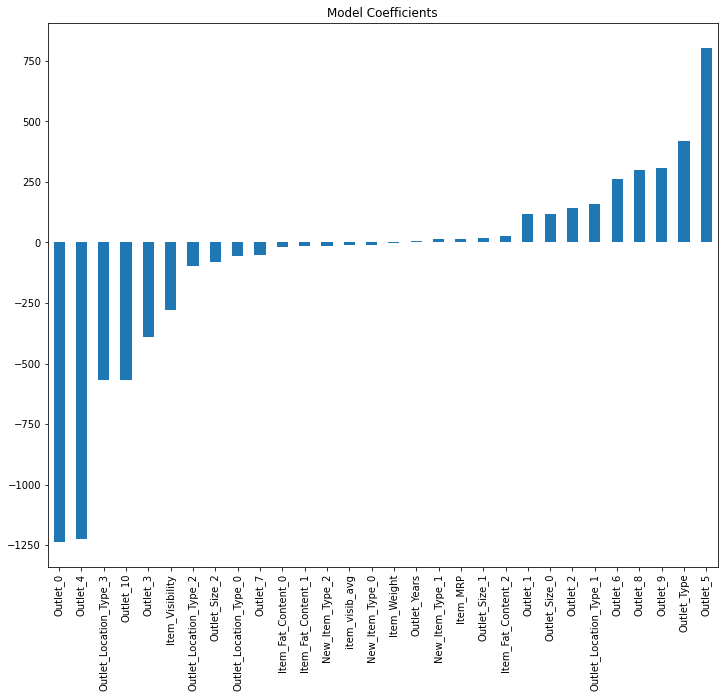

In [400]:
from sklearn.linear_model import LinearRegression

predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
plt.figure(figsize=(12,10))
coef1.plot(kind='bar', title='Model Coefficients')

**2.Decision Tree Regressor**

Accuracy_Score: 61.64 %

Model Report
RMSE : 1059
CV Score : Mean - 1092 | Std - 34.38 | Min - 1007 | Max - 1161


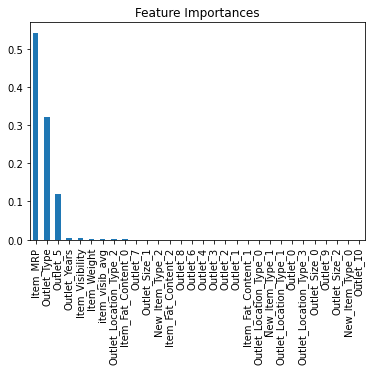

In [401]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

**3.Gradient Boosting Regressor**

Accuracy_Score: 56.48 %

Model Report
RMSE : 1128
CV Score : Mean - 1130 | Std - 32.48 | Min - 1067 | Max - 1192


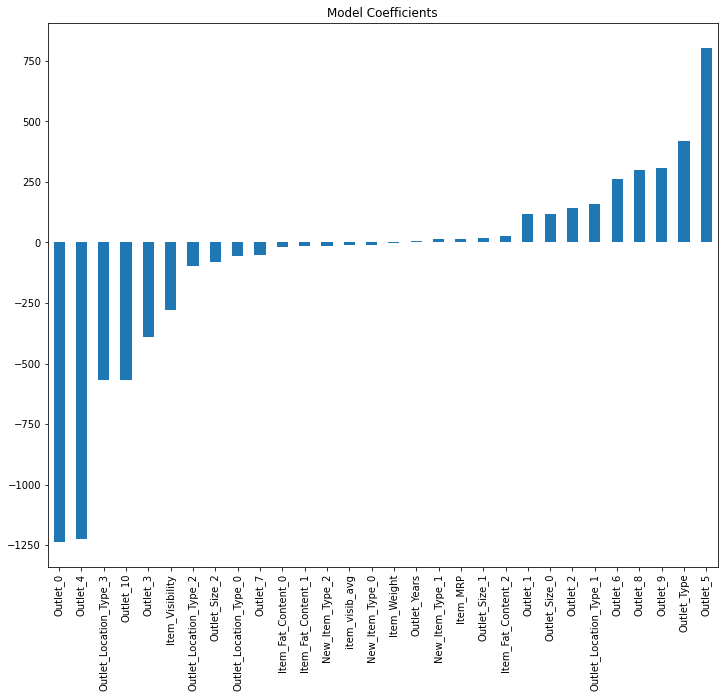

In [402]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg6 = GradientBoostingRegressor()
modelfit(alg1, train, test, predictors, target, IDcol, 'alg6.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
plt.figure(figsize=(12,10))
coef1.plot(kind='bar', title='Model Coefficients')

**4.Random Forest Regressor**

Accuracy_Score: 60.63 %

Model Report
RMSE : 1073
CV Score : Mean - 1084 | Std - 33.55 | Min - 1018 | Max - 1141


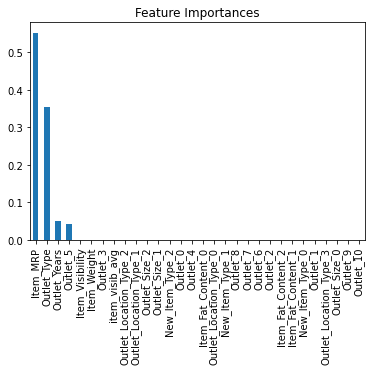

In [403]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, train, test, predictors, target, IDcol, 'alg5.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

**5.KNeighbors Regressor**

In [404]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg7 = KNeighborsRegressor()
modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')

Accuracy_Score: 65.64 %

Model Report
RMSE : 1002
CV Score : Mean - 1232 | Std - 49.64 | Min - 1154 | Max - 1345


**Observation** : I came to a conclusion that "KNeighborsRegresso" is the best model to be fitted with prediction for Big-Mart Sales Problem Prediction Model 

**Hyper parameter tuning**

In [405]:
from sklearn.model_selection import GridSearchCV

In [406]:
parameter={'n_neighbors':np.arange(1,5),
           'weights':['uniform', 'distance'],
           'n_jobs':np.arange(-1,1)}

In [407]:
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [ ]:
GCV.fit(train, test, predictors, target)

In [ ]:
GCV.best_params_

In [409]:
Final_mod = KNeighborsRegressor(n_neighbors = 5 , n_jobs = -1, weights = 'uniform')
modelfit(alg7, train, test, predictors, target, IDcol, 'alg7.csv')

Accuracy_Score: 65.64 %

Model Report
RMSE : 1002
CV Score : Mean - 1232 | Std - 49.64 | Min - 1154 | Max - 1345


**Saving Final Model**

In [410]:
# Dumping Data in pickle file.

import joblib
joblib.dump(Final_mod,'Big-Mart Sales Problem.pkl')

['Big-Mart Sales Problem.pkl']